In [3]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [5]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install natsort

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [9]:
DIR=r'C:\Users\HP\Downloads\plant-pathology-2020-fgvc7\images'

In [10]:
train=pd.read_csv(r"C:\Users\HP\Downloads\plant-pathology-2020-fgvc7\train.csv")
test=pd.read_csv(r"C:\Users\HP\Downloads\plant-pathology-2020-fgvc7\test.csv")

In [11]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [12]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


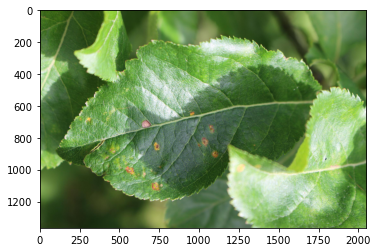

In [13]:
image1=Image.open(r'C:\Users\HP\Downloads\plant-pathology-2020-fgvc7\images\Test_1.jpg')
plt.imshow(image1)
plt.show()

In [15]:
# Prepare the Training Data

In [14]:
class_names=train.loc[:,'healthy':].columns
print(class_names)

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [15]:
number=0
train['label']=0     #making new column as label
for i in class_names:
    train['label']=train['label'] + train[i] * number       #if train label healthy =0 same asmore
    number=number+1

In [16]:
train.head()           #if just given train then we will be able to see that it will classify all the sets

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [17]:
DIR

'C:\\Users\\HP\\Downloads\\plant-pathology-2020-fgvc7\\images'

In [18]:
import natsort
natsort.natsorted(os.listdir(DIR))          #for making all the test cases in the chronological order

['Test_0.jpg',
 'Test_1.jpg',
 'Test_2.jpg',
 'Test_3.jpg',
 'Test_4.jpg',
 'Test_5.jpg',
 'Test_6.jpg',
 'Test_7.jpg',
 'Test_8.jpg',
 'Test_9.jpg',
 'Test_10.jpg',
 'Test_11.jpg',
 'Test_12.jpg',
 'Test_13.jpg',
 'Test_14.jpg',
 'Test_15.jpg',
 'Test_16.jpg',
 'Test_17.jpg',
 'Test_18.jpg',
 'Test_19.jpg',
 'Test_20.jpg',
 'Test_21.jpg',
 'Test_22.jpg',
 'Test_23.jpg',
 'Test_24.jpg',
 'Test_25.jpg',
 'Test_26.jpg',
 'Test_27.jpg',
 'Test_28.jpg',
 'Test_29.jpg',
 'Test_30.jpg',
 'Test_31.jpg',
 'Test_32.jpg',
 'Test_33.jpg',
 'Test_34.jpg',
 'Test_35.jpg',
 'Test_36.jpg',
 'Test_37.jpg',
 'Test_38.jpg',
 'Test_39.jpg',
 'Test_40.jpg',
 'Test_41.jpg',
 'Test_42.jpg',
 'Test_43.jpg',
 'Test_44.jpg',
 'Test_45.jpg',
 'Test_46.jpg',
 'Test_47.jpg',
 'Test_48.jpg',
 'Test_49.jpg',
 'Test_50.jpg',
 'Test_51.jpg',
 'Test_52.jpg',
 'Test_53.jpg',
 'Test_54.jpg',
 'Test_55.jpg',
 'Test_56.jpg',
 'Test_57.jpg',
 'Test_58.jpg',
 'Test_59.jpg',
 'Test_60.jpg',
 'Test_61.jpg',
 'Test_62.jpg',
 '

In [19]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]      #to split the name as test66 and .jpg  if we give index 0 it give test66
        label=train.loc[train['image_id']==img]['label']
        return label

In [20]:
import natsort
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR))        
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR,img)
        
        if search("Train",img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:      
                shutil.copy(path,r'C:\Users\HP\Downloads\images\train\healthy')
            
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,r'C:\Users\HP\Downloads\images\train\multiple_diseases')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,r'C:\Users\HP\Downloads\images\train\rust')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,r'C:\Users\HP\Downloads\images\train\scab')
                
        elif search("Test",img):
            shutil.copy(path,r'C:\Users\HP\Downloads\images\test')
                

In [33]:
shutil.os.mkdir(r'C:\Users\HP\Downloads\images\train')
shutil.os.mkdir(r'C:\Users\HP\Downloads\images\train\healthy')
shutil.os.mkdir(r'C:\Users\HP\Downloads\images\train\multiple_diseases')
shutil.os.mkdir(r'C:\Users\HP\Downloads\images\train\rust')
shutil.os.mkdir(r'C:\Users\HP\Downloads\images\train\scab')

shutil.os.mkdir(r'C:\Users\HP\Downloads\images\test')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\HP\\Downloads\\images\\train'

In [23]:
train_dir = create_train_data()
#INORDER TO CLASSIFY ALL THE IMAGES OF TRAIN DATA TO DIFFERNT CATEGORIES 

100%|█████████████████████████████████████████████████████████████████████████████| 3642/3642 [00:12<00:00, 281.39it/s]


In [ ]:
# NOW WE HAVE TO PROCESS OUR DATA 

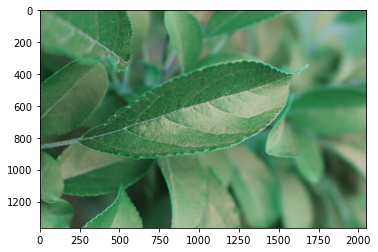

In [22]:
import cv2
Train_DIR=r'C:\Users\HP\Downloads\images\train'    #INORDER TO REDUCE TO SIZE FOR BETTER CLARITY OF IMAGES
Categories=['healthy','multiple_disease','rust','scab']

for j in Categories:
    path=os.path.join(Train_DIR,j)          #JOINING THE TEST TO TRAIN TO PERFORM 
    for img in os.listdir(path):
        old=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB) #INORDER TO GET SOME COLOR TO DETECT THE LEAF
        plt.imshow(old)
        plt.show()
        break
    break

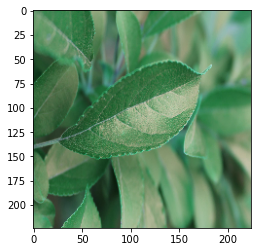

In [23]:
IMG_SIZE=224       #NOW WE WILL RESIZE THEM INORDER TO MAINTAIN ITS PIXEL FOR DETECTION
new_image=cv2.resize(old,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

In [31]:
# MODEL PREPERATION

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D

In [4]:
IMG_SIZE=224 
datagen=ImageDataGenerator(rescale=1./255,               #to make all the images in particular range
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)


train_datagen=datagen.flow_from_directory(r'C:\Users\HP\Downloads\images\train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')

val_datagen=datagen.flow_from_directory(r'C:\Users\HP\Downloads\images\train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='validation')

Found 1458 images belonging to 4 classes.
Found 363 images belonging to 4 classes.


In [8]:
#neural network making

In [5]:
IMG_SIZE=224 
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))  #3 as we having rgb images 1 for grey image   also added padding was most important to make the size of image to 500 which we have mentioned above
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())                                     #to see all the neurons (parts) clearly 
model.add(Dense(4,activation='softmax'))

# Compile the Model               making the model to realise the images and predict on the basis of that
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  #we are choosing the adam optimiser as it is till best for view
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [6]:
checkpoint=ModelCheckpoint(r'C:\Users\HP\Downloads\images\models\plant detect2.h5',   #to save the best only of the data 
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]


In [7]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,
                                 epochs=30,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16,
                                 callbacks=callbacks)

C:\Users\HP\AppData\Local\Temp/ipykernel_14196/1407545075.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(train_datagen,validation_data=val_datagen,


Epoch 1/30
91/91 [==============================] - ETA: 0s - loss: 1.2660 - accuracy: 0.3322
Epoch 1: val_loss improved from inf to 1.25076, saving model to C:\Users\HP\Downloads\images\models\plant detect2.h5
91/91 [==============================] - 162s 2s/step - loss: 1.2660 - accuracy: 0.3322 - val_loss: 1.2508 - val_accuracy: 0.2955
Epoch 2/30
91/91 [==============================] - ETA: 0s - loss: 1.2469 - accuracy: 0.3391
Epoch 2: val_loss did not improve from 1.25076
91/91 [==============================] - 259s 3s/step - loss: 1.2469 - accuracy: 0.3391 - val_loss: 1.2528 - val_accuracy: 0.3239
Epoch 3/30
91/91 [==============================] - ETA: 0s - loss: 1.1809 - accuracy: 0.4612
Epoch 3: val_loss improved from 1.25076 to 0.97181, saving model to C:\Users\HP\Downloads\images\models\plant detect2.h5
91/91 [==============================] - 273s 3s/step - loss: 1.1809 - accuracy: 0.4612 - val_loss: 0.9718 - val_accuracy: 0.5511
Epoch 4/30
91/91 [=========================

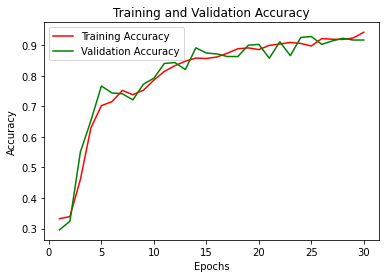

In [8]:
import matplotlib.pyplot as plt
acc_train=model_history.history['accuracy']                         #graphical representation of accuracy
acc_val=model_history.history['val_accuracy']
epochs=range(1,31)
plt.plot(epochs,acc_train,'r',label='Training Accuracy')
plt.plot(epochs,acc_val,'g',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

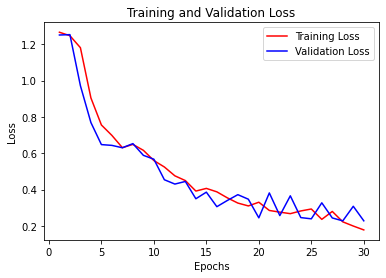

In [9]:
loss_train=model_history.history['loss']              #graphical representation of loss
loss_val=model_history.history['val_loss']
epochs=range(1,31)
plt.plot(epochs,loss_train,'r',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# prediction of leaf for a single image


In [18]:
from PIL import Image
test_image=r'C:\Users\HP\Downloads\images\Test_28.jpg'
image_result=Image.open(test_image)

0


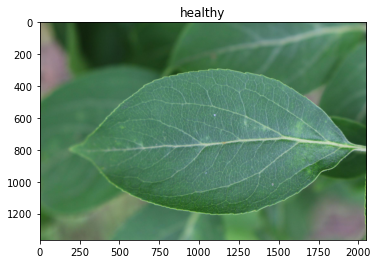

In [19]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)              #converting to 4 dimension 
result=model.predict(test_image)
print(np.argmax(result))

Categories=['healthy','multiple_disease','rust','scab']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()
